In [1]:
%matplotlib inline
from pylab import *

In [2]:
from sklearn import datasets
import json

In [3]:
faces = datasets.fetch_olivetti_faces()

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

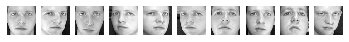

In [4]:
for i in range(10):
    face = faces.images[i]
    subplot(1, 10, i + 1)
    imshow(face.reshape((64, 64)), cmap='gray')
    axis('off')

In [5]:

class Trainer:
    def __init__(self):
        self.results = {}
        self.imgs = faces.images
        self.index = 0
        
    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                print(self.index)
                self.index += 1
            return self.index
    
    def record_result(self, smile=True):
        self.results[str(self.index)] = smile

In [6]:
trainer = Trainer()

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output

Button(description='smile', style=ButtonStyle())

Button(description='sad face', style=ButtonStyle())

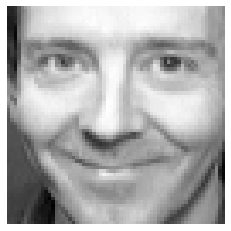

In [8]:
button_smile = widgets.Button(description='smile')
button_no_smile = widgets.Button(description='sad face')

def display_face(face):
    clear_output()
    imshow(face, cmap='gray')
    axis('off')

def update_smile(b):
    trainer.record_result(smile=True)
    trainer.increment_face()
    
    display_face(trainer.imgs[trainer.index])  
    
    display(button_smile)
    display(button_no_smile)
    
    
    button_no_smile.on_click(update_no_smile)
    button_smile.on_click(update_smile)
    
    print(trainer)
    
def update_no_smile(b):
    trainer.record_result(smile=False)
    trainer.increment_face()
    
    display_face(trainer.imgs[trainer.index])  
    
    display(button_smile)
    display(button_no_smile)
    
    #display_face(trainer.imgs[trainer.index])  
    
    button_no_smile.on_click(update_no_smile)
    button_smile.on_click(update_smile)
    
    print(trainer)
    
display_face(trainer.imgs[trainer.index])

display(button_smile)
display(button_no_smile)

button_no_smile.on_click(update_no_smile)
button_smile.on_click(update_smile)




In [30]:
#import json

#with open('results_3.xml', 'w') as f:
    #json.dump(trainer.results, f)

In [11]:
smiling_indices = [int(i) for i in trainer.results if trainer.results[i] == True]

In [12]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[smiling_indices[i]], cmap=plt.cm.bone)
    
    # label the image with the target value
    p.text(0, 14, "smiling")
    p.text(0, 60, str(i))
    p.axis('off')

<Figure size 864x864 with 0 Axes>

In [13]:
 not_smiling_indices = [int(i) for i in trainer.results if trainer.results[i] == False]

In [14]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(not_smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[not_smiling_indices[i]], cmap=plt.cm.bone)

    # label the image with the target value
    p.text(0, 14, "not smiling")
    p.text(0, 60, str(i))
    p.axis('off')

<Figure size 864x864 with 0 Axes>

In [15]:
import pylab
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [16]:
faces.keys()


dict_keys(['data', 'images', 'target', 'DESCR'])

In [17]:
faces.images.shape

(400, 64, 64)

In [18]:
 print(faces.data.shape)
print( faces.target.shape)

(400, 4096)
(400,)


In [19]:
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.5470426


In [20]:
def print_faces(images, tr, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        if tr[str(i)] == False:
            p.text(0, 14, "notsmiling")
            p.text(0, 60, str(i))
        else:
            p.text(0, 14, "smiling")
            p.text(0, 60, str(i))
            

In [21]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print(svc_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [22]:
from sklearn.svm import SVC

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

In [25]:
indices = [i for i in trainer.results]
data = faces.data[indices, :]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

NameError: name 'target' is not defined

In [ ]:
target = [trainer.results[i] for i in trainer.results]
target = array(target).astype(int32)

In [ ]:
faces.data


In [ ]:
target


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

In [ ]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(n_splits=K, shuffle=True, random_state=45)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

In [ ]:
evaluate_cross_validation(svc_1, faces, target, 5)

In [ ]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [ ]:
#train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

In [ ]:
'''random_image_button = widgets.Button(description="New image!")

def display_face_and_prediction(b):
    index = randint(0, 400)
    face = faces.images[index]
    display_face(face)
    print("this person is smiling: {0}".format(svc_1.predict(faces.data[index, :])==1))

random_image_button.on_click(display_face_and_prediction)
display(random_image_button)
display_face_and_prediction(0)'''

In [ ]:
import cv2

In [ ]:
input_face = cv2.imread('face6.jpg')

In [ ]:
face_csc = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
webcam = cv2.VideoCapture(0)
tf, frame = webcam.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
detected_faces = face_csc.detectMultiScale(gray, 1.2 , 4)

detected_faces

In [ ]:
from matplotlib.patches import Rectangle
import cv2
import numpy as np
import matplotlib.pyplot as plt

ax = plt.gca()
ax.imshow(gray, cmap='gray')
for (x, y, w, h) in detected_faces:
    ax.add_artist(Rectangle((x, y), w, h, fill=False, lw=5, color='blue'))
    
svc_1.predict(frame[x:x+w, y:y+h].reshape(1,-1))==1

In [ ]:
status = cv2.imwrite('faces_detected.jpg', frame)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

In [ ]:
#svc_1.predict(np.array([[277,211,140,140]].reshape(1,-1),dtype=32)
svc_1.predict(np.array([[277,211,140,140]]).reshape(1,-1))==1
region = I[277:211,140:]

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 28 08:34:42 2019

@author: Aaron Shi
"""

import matplotlib
import pylab
from sklearn import datasets
import json
import IPython
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def print_faces(images, tr, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(faces.images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        if tr[str(i)] == False:
            p.text(0, 14, "notsmiling")
            p.text(0, 60, str(i))
        else:
            p.text(0, 14, "smiling")
            p.text(0, 60, str(i))
                        
faces = datasets.fetch_olivetti_faces()

with open("results.xml","r") as f:
    d = json.load(f)
    
#print_faces(faces, d, 400)

svc_1 = SVC(kernel='linear')

target = [d[i] for i in d]
target = np.array(target).astype(np.int32)

x,y = faces.data[:-1], target[:-1]

#svc_1.fit(faces.data, target)
svc_1.fit(x,y)
#index = randint(0,400)

print('this person is smiling:{0}'.format(svc_1.predict(faces.data[-1, :].reshape(1,-1))==1))

plt.imshow(faces.images[-1],cmap = plt.cm.gray, interpolation = "nearest")

plt.show()